In [12]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

mpg_data = pd.read_csv('auto-mpg.csv')
print(mpg_data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Create a Plot of MPG versus each of the other variables

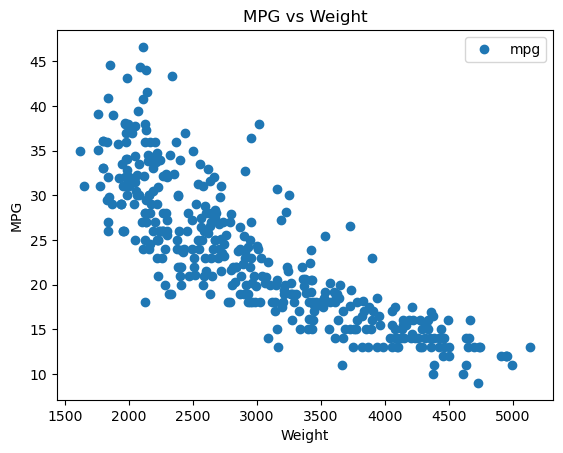

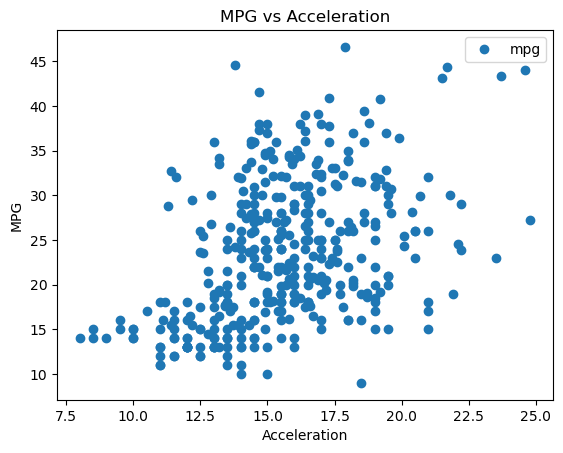

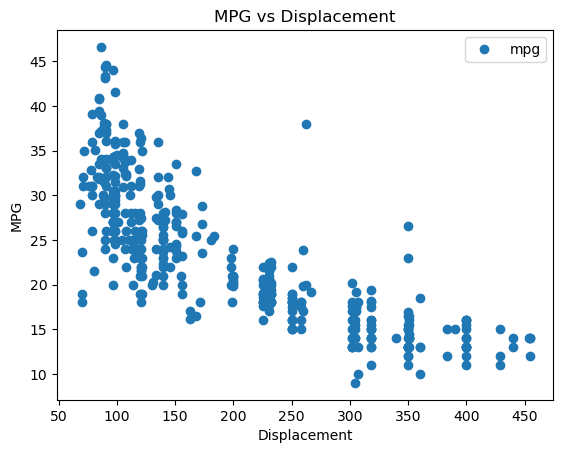

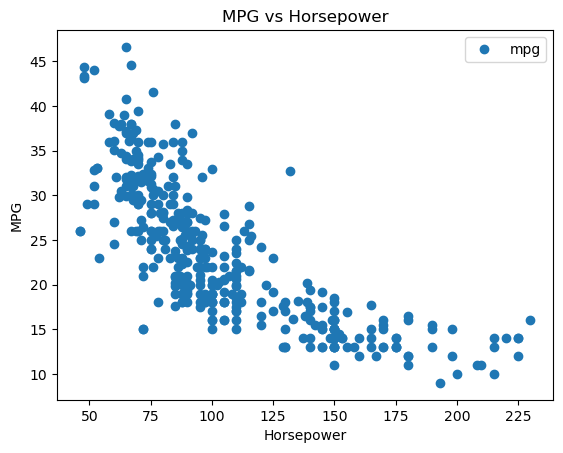

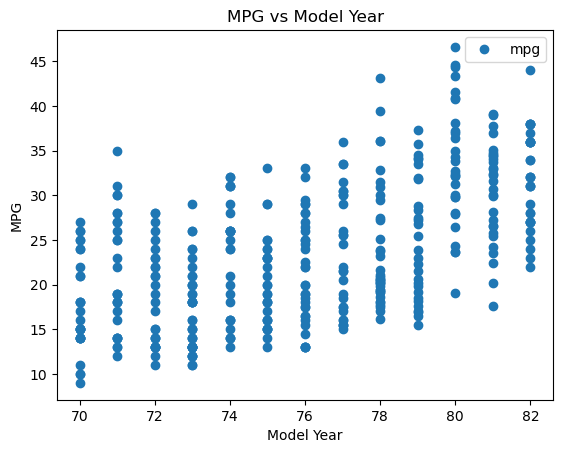

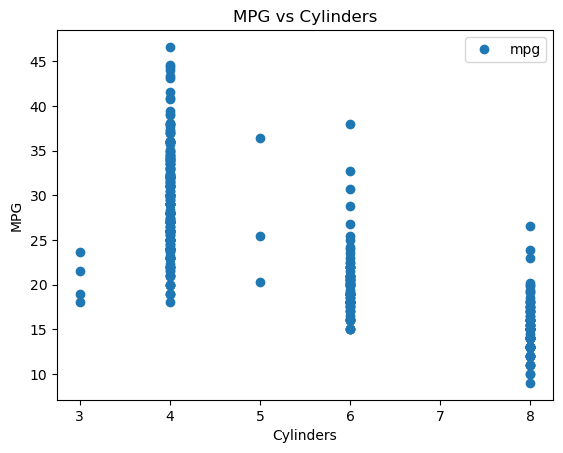

In [13]:
mpg_data.plot(x='weight', y='mpg', style='o')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

mpg_data.plot(x='acceleration', y='mpg', style='o')
plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

mpg_data.plot(x='displacement', y='mpg', style='o')
plt.title('MPG vs Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

# Convert horsepower to numeric, the coerce will make those question marks NaN values which will get ignored in the plots
mpg_data['horsepower'] = pd.to_numeric(mpg_data['horsepower'], errors='coerce')
mpg_data.plot(x='horsepower', y='mpg', style='o')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

mpg_data.plot(x='model year', y='mpg', style='o')
plt.title('MPG vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()

mpg_data.plot(x='cylinders', y='mpg', style='o')
plt.title('MPG vs Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()


In [14]:
# removing rows with NaN values.
mpg_data = mpg_data.dropna()


In [15]:
# Create normalized column data
mpg_data['weight_norm'] = (mpg_data['weight'] - mpg_data['weight'].mean()) / mpg_data['weight'].std()
mpg_data['acceleration_norm'] = (mpg_data['acceleration'] - mpg_data['acceleration'].mean()) / mpg_data['acceleration'].std()
mpg_data['displacement_norm'] = (mpg_data['displacement'] - mpg_data['displacement'].mean()) / mpg_data['displacement'].std()
mpg_data['horsepower_norm'] = (mpg_data['horsepower'] - mpg_data['horsepower'].mean()) / mpg_data['horsepower'].std()
mpg_data['model_year_norm'] = (mpg_data['model year'] - mpg_data['model year'].mean()) / mpg_data['model year'].std()
mpg_data['cylinders_norm'] = (mpg_data['cylinders'] - mpg_data['cylinders'].mean()) / mpg_data['cylinders'].std()

/tmp/ipykernel_234174/1213448761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data['weight_norm'] = (mpg_data['weight'] - mpg_data['weight'].mean()) / mpg_data['weight'].std()
/tmp/ipykernel_234174/1213448761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data['acceleration_norm'] = (mpg_data['acceleration'] - mpg_data['acceleration'].mean()) / mpg_data['acceleration'].std()
/tmp/ipykernel_234174/1213448761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

3.404434017779641
Intercept            0.000000e+00
weight_norm          1.416190e-21
acceleration_norm    4.038303e-01
displacement_norm    2.973318e-01
horsepower_norm      9.774501e-01
model_year_norm      1.410428e-37
cylinders_norm       3.212169e-01
dtype: float64


/tmp/ipykernel_234174/2463658797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data["MPG_Prediction"] = mpg_pred
/tmp/ipykernel_234174/2463658797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data["MPG_Residual"] = mpg_data["mpg"] - mpg_data["MPG_Prediction"]


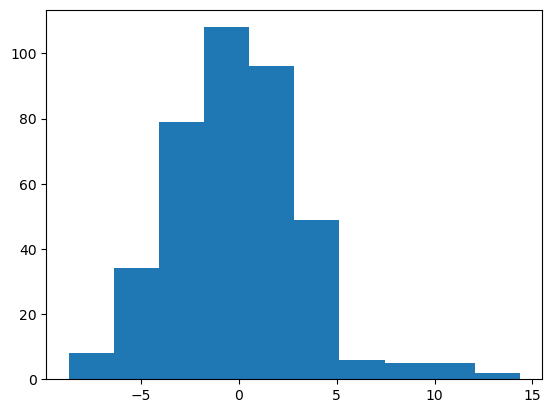

In [16]:
model = smf.ols(formula='mpg ~ weight_norm + acceleration_norm + displacement_norm + horsepower_norm + model_year_norm + cylinders_norm', data=mpg_data)
model = model.fit()

mpg_pred = model.predict()

mpg_data["MPG_Prediction"] = mpg_pred
mpg_data["MPG_Residual"] = mpg_data["mpg"] - mpg_data["MPG_Prediction"]

# Create histogram of residuals
plt.hist(mpg_data["MPG_Residual"])
# Get standard deviation of residuals
print(np.std(mpg_data["MPG_Residual"])) 

# print the P value of each term
print(model.pvalues)

/tmp/ipykernel_234174/516778208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data["MPG_Prediction"] = mpg_pred
/tmp/ipykernel_234174/516778208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_data["MPG_Residual"] = mpg_data["mpg"] - mpg_data["MPG_Prediction"]


2.6859472967583224
Intercept                              8.055642e-203
weight_norm                             1.351917e-10
acceleration_norm                       5.812116e-02
displacement_norm                       2.767923e-02
horsepower_norm                         8.321801e-05
model_year_norm                         4.416477e-41
cylinders_norm                          9.020169e-02
weight_norm:acceleration_norm           2.829229e-01
weight_norm:displacement_norm           1.151328e-02
weight_norm:horsepower_norm             2.036858e-01
weight_norm:model_year_norm             2.039453e-01
weight_norm:cylinders_norm              9.360958e-01
acceleration_norm:displacement_norm     4.533681e-02
acceleration_norm:horsepower_norm       1.148583e-01
acceleration_norm:model_year_norm       3.487977e-02
acceleration_norm:cylinders_norm        8.072872e-02
displacement_norm:horsepower_norm       5.051364e-01
displacement_norm:model_year_norm       2.595722e-02
displacement_norm:cylinders

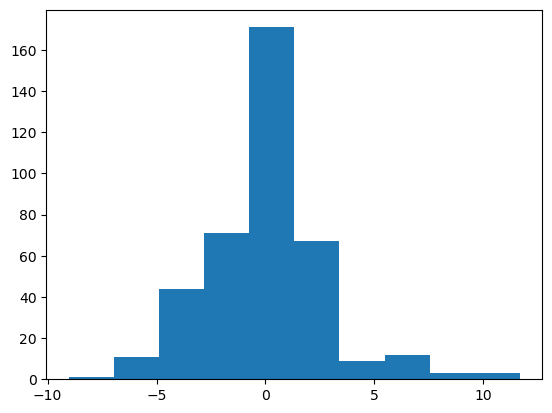

In [17]:
# Making a new model with all 21 interaction terms

model = smf.ols(formula='mpg ~ weight_norm + acceleration_norm + displacement_norm + horsepower_norm + model_year_norm + cylinders_norm + weight_norm * acceleration_norm + weight_norm * displacement_norm + weight_norm * horsepower_norm + weight_norm * model_year_norm + weight_norm * cylinders_norm + acceleration_norm * displacement_norm + acceleration_norm * horsepower_norm + acceleration_norm * model_year_norm + acceleration_norm * cylinders_norm + displacement_norm * horsepower_norm + displacement_norm * model_year_norm + displacement_norm * cylinders_norm + horsepower_norm * model_year_norm + horsepower_norm * cylinders_norm + model_year_norm * cylinders_norm', data=mpg_data)
model = model.fit()

mpg_pred = model.predict()

mpg_data["MPG_Prediction"] = mpg_pred
mpg_data["MPG_Residual"] = mpg_data["mpg"] - mpg_data["MPG_Prediction"]

# Create histogram of residuals
plt.hist(mpg_data["MPG_Residual"])
# Get standard deviation of residuals
print(np.std(mpg_data["MPG_Residual"])) 

# print the P value of each term
print(model.pvalues)

Looks like the most significant terms have to to with horsepower, and looks like the standard deviation of the residuals is lower which might be a sign the model could be better.

2.694235930254566
Intercept                              6.035119e-203
weight_norm                             1.792466e-10
acceleration_norm                       6.201676e-02
displacement_norm                       4.738894e-02
horsepower_norm                         5.596527e-05
model_year_norm                         3.936277e-41
cylinders_norm                          1.706175e-01
weight_norm:acceleration_norm           3.137146e-01
weight_norm:displacement_norm           1.388497e-02
weight_norm:horsepower_norm             2.765433e-01
weight_norm:model_year_norm             2.701808e-01
weight_norm:cylinders_norm              9.877656e-01
acceleration_norm:displacement_norm     5.344307e-02
acceleration_norm:horsepower_norm       1.646472e-01
acceleration_norm:model_year_norm       3.771249e-02
acceleration_norm:cylinders_norm        1.009572e-01
displacement_norm:horsepower_norm       2.653183e-01
displacement_norm:model_year_norm       9.939891e-02
displacement_norm:cylinders_

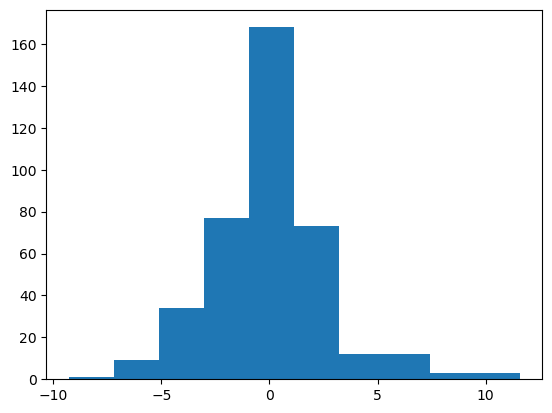

In [18]:
# create a new model with only P values greater than 0.05
model = smf.ols(formula='mpg ~ weight_norm + acceleration_norm + displacement_norm + horsepower_norm + model_year_norm + cylinders_norm + weight_norm * acceleration_norm + weight_norm * displacement_norm + weight_norm * horsepower_norm + weight_norm * model_year_norm + weight_norm * cylinders_norm + acceleration_norm * displacement_norm + acceleration_norm * horsepower_norm + acceleration_norm * model_year_norm + acceleration_norm * cylinders_norm + displacement_norm * horsepower_norm + displacement_norm * model_year_norm + displacement_norm * cylinders_norm + horsepower_norm * model_year_norm + horsepower_norm * cylinders_norm', data=mpg_data)
model = model.fit()

mpg_pred = model.predict()

mpg_data["MPG_Prediction"] = mpg_pred
mpg_data["MPG_Residual"] = mpg_data["mpg"] - mpg_data["MPG_Prediction"]

# Create histogram of residuals
plt.hist(mpg_data["MPG_Residual"])
# Get standard deviation of residuals
print(np.std(mpg_data["MPG_Residual"])) 

# print the P value of each term
print(model.pvalues)

Final standard deviation of 2.694